In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest4.csv")
df.head(20)

,question_id,student_answer,score
0,4,اسرافيل عليه السلام,1
1,4,اسرافيل,1
2,4,الملك إسرافيل,1
3,4,اسرافيل,1
4,4,إسرافيل عليه السلام,1
5,4,إسرافيل,1
6,4,اسرافيل,1
7,4,عزرائيل,0
8,4,اسرائيل,0
9,4,اسرافبل,1


In [93]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     107 non-null    int64 
 1   student_answer  107 non-null    object
 2   score           107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [94]:
df.groupby('score').size()

score
0    24
1    83
dtype: int64

In [95]:
df.duplicated().sum()

75

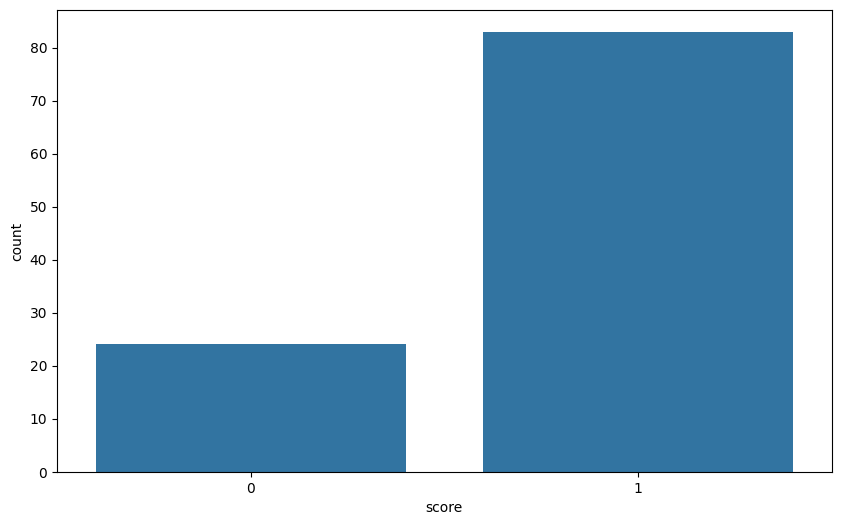

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [105]:
import pandas as pd
df = pd.read_csv('./quest4.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 5 ))
csv = './question4.csv'
df2.to_csv(csv,index=False)
print(len(df1))

32


In [106]:
df = pd.read_csv("question4.csv")
df.head(20)

,question_id,student_answer,score
0,4,اسرافيل عليه السلام,5
1,4,اسرافيل,5
2,4,الملك إسرافيل,5
3,4,اسرافيل,5
4,4,إسرافيل عليه السلام,5
5,4,إسرافيل,5
6,4,عزرائيل,0
7,4,اسرائيل,0
8,4,اسرافبل,5
9,4,إسرافيل,5


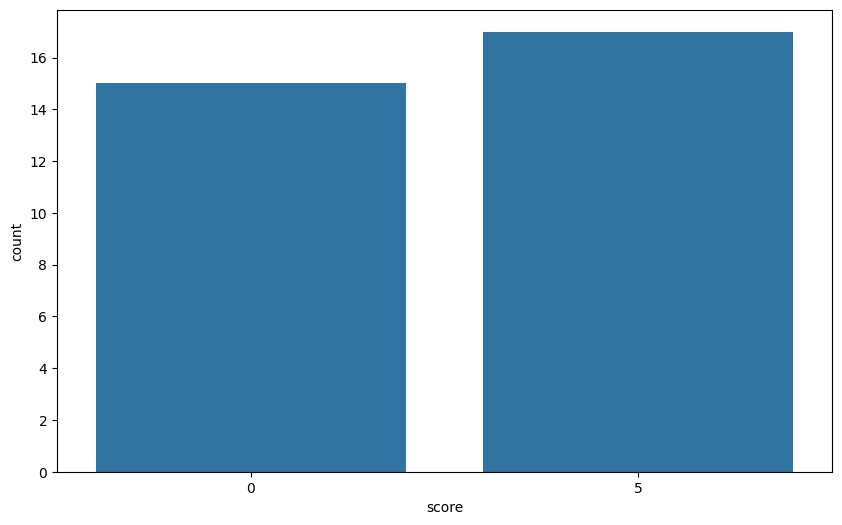

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [108]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [109]:
import nltk
from nltk.tokenize import word_tokenize

In [110]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [111]:
from gensim.models import Word2Vec

In [112]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [113]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [114]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,4,اسرافيل عليه السلام,5,"[اسرافيل, عليه, السلام]","[-0.015287338, 0.013621475, -0.014183464, -0.0..."
1,4,اسرافيل,5,[اسرافيل],"[-0.0071403356, 0.0012419409, -0.007175791, -0..."
2,4,الملك إسرافيل,5,"[الملك, إسرافيل]","[-0.009159795, 0.00390492, 0.010300905, 0.0147..."
3,4,اسرافيل,5,[اسرافيل],"[-0.0071403356, 0.0012419409, -0.007175791, -0..."
4,4,إسرافيل عليه السلام,5,"[إسرافيل, عليه, السلام]","[-0.016769815, 0.016045801, -0.0018181095, 0.0..."
